# Transformación y Limpieza de los datos

In [60]:
# Librerías necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [61]:
# Mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar todas las columnas (si necesitas ver todas)
pd.set_option('display.max_columns', None)


## Dataset: Departamentos

### General

In [62]:
# Cargar los datos y visualizarlos
df_1 = pd.read_csv('/Users/samanthaestudillo/Documents/Notebooks/Anuncios de alquiler/Geocode/depas_geocode.csv')
df_1.head()

,Precio,Dirección,Ubicación,Características,Descripción,Latitud,Longitud
0,"Departamentos desdeMN 24,100","Av. Revolución #2703, Col. Ladrillera, Monterr...","Ladrillera, Monterrey",204 un.1 a 3 rec.,"Más que un hogar, Gran Ciudad es un concepto d...",25.655170,-100.274735
1,"Departamentos desdeMN 15,150","Melchor Ocampo 380, Centro","Centro, Monterrey",236 un.1 a 3 rec.,Estrena departamento pet-friendly en el corazó...,25.678037,-100.313307
2,"MN 38,000",No disponible,"Vía Cordillera, Santa Catarina",88 m² tot.2 rec.2 baños2 estac.,Departamento Amueblado en Renta. Torre Cian de...,25.658349,-100.439188
3,"MN 75,000",No disponible,"Valle del Campestre, San Pedro Garza García",112 m² tot.2 rec.2 baños2 estac.,Exclusivo Departamento de 2 recamaras totalmen...,25.649390,-100.356105
4,"MN 140,000",No disponible,"Valle del Campestre, San Pedro Garza García",288 m² tot.3 rec.3 baños3 estac.,Exclusivo Departamento de 3 recamaras totalmen...,25.649390,-100.356105


In [63]:
# Información general
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Precio           600 non-null    object 
 1   Dirección        600 non-null    object 
 2   Ubicación        600 non-null    object 
 3   Características  600 non-null    object 
 4   Descripción      600 non-null    object 
 5   Latitud          600 non-null    float64
 6   Longitud         600 non-null    float64
dtypes: float64(2), object(5)
memory usage: 32.9+ KB


In [64]:
# Verificar valores nulos
df1_null = df_1.isnull().sum()
print(f"Valores nulos:\n{df1_null}\n")

# Verificar duplicados
df1_duplicates = df_1.duplicated().sum()
print(f"Hay {df1_duplicates} duplicados en el dataframe")

Valores nulos:
Precio             0
Dirección          0
Ubicación          0
Características    0
Descripción        0
Latitud            0
Longitud           0
dtype: int64

Hay 3 duplicados en el dataframe


In [65]:
# Filtrar y mostrar las filas duplicadas
duplicates = df_1[df_1.duplicated(keep=False)]
duplicates

,Precio,Dirección,Ubicación,Características,Descripción,Latitud,Longitud
27,"MN 42,990",No disponible,"Valle del Campestre, San Pedro Garza García",1 rec.1 baño1 estac.,"LofT de Arboleda, en Dana con vista a Sierra M...",25.649390,-100.356105
48,"MN 25,500",No disponible,"Zona Valle Poniente, San Pedro Garza García",60 m² tot.1 baño1 estac.,Departamento en renta tipo loft en Vía Cordill...,25.652688,-100.412265
224,"MN 25,500",No disponible,"Zona Valle Poniente, San Pedro Garza García",60 m² tot.1 baño1 estac.,Departamento en renta tipo loft en Vía Cordill...,25.652688,-100.412265
545,"MN 42,990",No disponible,"Valle del Campestre, San Pedro Garza García",1 rec.1 baño1 estac.,"LofT de Arboleda, en Dana con vista a Sierra M...",25.649390,-100.356105
581,"MN 27,000",No disponible,"Centro, Monterrey",65 m² tot.2 rec.2 baños2 estac.,Departamento amueblado en renta Torre Repúblic...,25.678037,-100.313307
596,"MN 27,000",No disponible,"Centro, Monterrey",65 m² tot.2 rec.2 baños2 estac.,Departamento amueblado en renta Torre Repúblic...,25.678037,-100.313307


In [66]:
# Eliminar duplicados 
df_1 = df_1.drop_duplicates()

# Verificar duplicados
df1_duplicates = df_1.duplicated().sum()
print(f"Hay {df1_duplicates} duplicados en el dataframe")

Hay 0 duplicados en el dataframe


### Columna 'Precio'

In [67]:
# Mostrar valores de columna 
price_dep = df_1.sort_values(by='Precio')
print(price_dep[['Precio']])

                                 Precio
1          Departamentos desdeMN 15,150
0          Departamentos desdeMN 24,100
39                            MN 10,000
163                           MN 10,000
518                           MN 10,500
228                           MN 10,990
499                          MN 100,000
105                          MN 100,000
231                           MN 11,000
185                           MN 11,000
312        MN 11,000MN 10 Mantenimiento
90                            MN 11,400
115                           MN 11,500
130                           MN 11,500
35                            MN 11,500
465                           MN 11,990
311                          MN 110,000
235                          MN 110,000
236                        MN 110,0008%
511                           MN 12,000
416                           MN 12,000
294                           MN 12,000
302                           MN 12,000
284                           MN 12,000


In [68]:
# Crear una nueva columna para almacenar los valores de Mantenimiento
df_1['Mantenimiento'] = df_1['Precio'].where(df_1['Precio'].str.contains('Mantenimiento', na=False))

# Extraer el monto del mantenimiento y eliminar el primer precio
df_1['Mantenimiento'] = df_1['Mantenimiento'].str.extract(r'MN\s*\d{1,3}(?:,\d{3})*\s*(MN\s*(\d{1,3}(?:,\d{3})*))')[1]

# Limpiar espacios
df_1['Mantenimiento'] = df_1['Mantenimiento'].str.replace('MN ', '').str.replace(',', '')


In [69]:
# Extraer el precio 
df_1['Precio'] = df_1['Precio'].str.extract(r'MN (\d{1,3}(?:,\d{3})*)')

# Quitar comas
df_1['Precio'] = df_1['Precio'].str.replace(',', '')

df_1.head(5)

,Precio,Dirección,Ubicación,Características,Descripción,Latitud,Longitud,Mantenimiento
0,24100,"Av. Revolución #2703, Col. Ladrillera, Monterr...","Ladrillera, Monterrey",204 un.1 a 3 rec.,"Más que un hogar, Gran Ciudad es un concepto d...",25.655170,-100.274735,NaN
1,15150,"Melchor Ocampo 380, Centro","Centro, Monterrey",236 un.1 a 3 rec.,Estrena departamento pet-friendly en el corazó...,25.678037,-100.313307,NaN
2,38000,No disponible,"Vía Cordillera, Santa Catarina",88 m² tot.2 rec.2 baños2 estac.,Departamento Amueblado en Renta. Torre Cian de...,25.658349,-100.439188,NaN
3,75000,No disponible,"Valle del Campestre, San Pedro Garza García",112 m² tot.2 rec.2 baños2 estac.,Exclusivo Departamento de 2 recamaras totalmen...,25.649390,-100.356105,NaN
4,140000,No disponible,"Valle del Campestre, San Pedro Garza García",288 m² tot.3 rec.3 baños3 estac.,Exclusivo Departamento de 3 recamaras totalmen...,25.649390,-100.356105,NaN


In [70]:
# Rellenar valores ausentes con 0 como número
df_1['Precio'] = df_1['Precio'].fillna(0)
df_1['Mantenimiento'] = df_1['Mantenimiento'].fillna(0)

# Convertir tipos de datos
df_1 = df_1.astype({
    'Precio': 'int64',
    'Mantenimiento': 'int64'
})


### Columna 'Dirección'

In [71]:
# Mostrar valores de columna 
address_dep = df_1.sort_values(by='Dirección')
print(address_dep[['Dirección']])

print(df_1['Dirección'].value_counts())

                                             Dirección
0    Av. Revolución #2703, Col. Ladrillera, Monterr...
1                           Melchor Ocampo 380, Centro
396                                      No disponible
397                                      No disponible
398                                      No disponible
399                                      No disponible
400                                      No disponible
401                                      No disponible
402                                      No disponible
403                                      No disponible
404                                      No disponible
405                                      No disponible
406                                      No disponible
407                                      No disponible
408                                      No disponible
409                                      No disponible
395                                      No disponible
394       

In [72]:
# Eliminar columna 
df_1 = df_1.drop('Dirección', axis=1)

### Columna 'Ubicación'

In [73]:
# Mostrar valores de columna 
location_dep = df_1.sort_values(by='Ubicación')
print(location_dep[['Ubicación']])

                                             Ubicación
360                               5 de Mayo, Monterrey
485                           Alfonso Reyes, Monterrey
402                           Alfonso Reyes, Monterrey
39              Alta Vista Sur Sector Lomas, Monterrey
297                   Altavista Invernadero, Monterrey
534                               Altavista, Monterrey
494                               Altavista, Monterrey
36                                Altavista, Monterrey
388                               Altavista, Monterrey
339                               Altavista, Monterrey
495                  AnAhuac, San Nicolás de los Garza
234                                  Azteca, Guadalupe
562                    Balcones de Satélite, Monterrey
169                          Bernardo Reyes, Monterrey
370             Bosques de La Huasteca, Santa Catarina
335             Bosques de La Huasteca, Santa Catarina
18          Bosques del Valle , San Pedro Garza García
406       

In [74]:
# Separar contenido de columna
df_1[['Zona', 'Ubicación']] = df_1['Ubicación'].str.split(',', n=1, expand=True)
print(df_1[['Zona', 'Ubicación']])

df_1['Zona'] = df_1['Zona'].str.strip() # Eliminar espacios en blanco adicionales
df_1['Ubicación'] = df_1['Ubicación'].str.strip()

                                Zona                  Ubicación
0                         Ladrillera                  Monterrey
1                             Centro                  Monterrey
2                     Vía Cordillera             Santa Catarina
3                Valle del Campestre     San Pedro Garza García
4                Valle del Campestre     San Pedro Garza García
5                Valle del Campestre     San Pedro Garza García
6                Valle del Campestre     San Pedro Garza García
7                Valle del Campestre     San Pedro Garza García
8                       El Aguacatal             Santa Catarina
9                     Vía Cordillera             Santa Catarina
10               Valle del Campestre     San Pedro Garza García
11               Valle del Campestre     San Pedro Garza García
12               Valle del Campestre     San Pedro Garza García
13                    Santa Engracia     San Pedro Garza García
14                       Santa María    

In [75]:
df_1['Ubicación'].value_counts()

Ubicación
Monterrey                   286
San Pedro Garza García      209
Santa Catarina               63
Nuevo León                   12
San Nicolás de los Garza     10
Guadalupe                     9
Apodaca                       5
García                        3
Name: count, dtype: int64

In [76]:
ubicaciones_dict = {
    'Monterrey': 101,
    'San Pedro Garza García': 102,
    'Santa Catarina': 103,
    'Nuevo León': 104,
    'San Nicolás de los Garza': 105,
    'Guadalupe': 106,
    'Apodaca': 107,
    'García': 108
}

# Paso 2: Crear la nueva columna 'Ubicación_ID' en el DataFrame
df_1['Ubicación_ID'] = df_1['Ubicación'].map(ubicaciones_dict)


In [77]:
df_1.head()

,Precio,Ubicación,Características,Descripción,Latitud,Longitud,Mantenimiento,Zona,Ubicación_ID
0,24100,Monterrey,204 un.1 a 3 rec.,"Más que un hogar, Gran Ciudad es un concepto d...",25.655170,-100.274735,0,Ladrillera,101
1,15150,Monterrey,236 un.1 a 3 rec.,Estrena departamento pet-friendly en el corazó...,25.678037,-100.313307,0,Centro,101
2,38000,Santa Catarina,88 m² tot.2 rec.2 baños2 estac.,Departamento Amueblado en Renta. Torre Cian de...,25.658349,-100.439188,0,Vía Cordillera,103
3,75000,San Pedro Garza García,112 m² tot.2 rec.2 baños2 estac.,Exclusivo Departamento de 2 recamaras totalmen...,25.649390,-100.356105,0,Valle del Campestre,102
4,140000,San Pedro Garza García,288 m² tot.3 rec.3 baños3 estac.,Exclusivo Departamento de 3 recamaras totalmen...,25.649390,-100.356105,0,Valle del Campestre,102


### Columna 'Características'

In [78]:
# Mostrar valores de columna 
df_1['Características'].value_counts()

Características
90 m² tot.2 rec.2 baños2 estac.       15
100 m² tot.2 rec.2 baños2 estac.      13
110 m² tot.2 rec.2 baños2 estac.      11
80 m² tot.2 rec.2 baños2 estac.       10
1 rec.1 baño1 estac.                   9
40 m² tot.1 rec.1 baño                 7
1 rec.1 baño                           7
60 m² tot.1 rec.1 baño1 estac.         6
50 m² tot.1 rec.1 baño1 estac.         6
105 m² tot.2 rec.2 baños2 estac.       6
120 m² tot.2 rec.2 baños2 estac.       6
65 m² tot.1 rec.1 baño1 estac.         6
45 m² tot.1 rec.1 baño1 estac.         5
140 m² tot.2 rec.2 baños2 estac.       5
1 m² tot.2 rec.2 baños2 estac.         5
70 m² tot.1 rec.1 baño1 estac.         5
112 m² tot.2 rec.2 baños2 estac.       5
96 m² tot.2 rec.2 baños2 estac.        5
70 m² tot.2 rec.2 baños1 estac.        5
100 m² tot.1 rec.1 baño1 estac.        4
2 rec.2 baños2 estac.                  4
115 m² tot.2 rec.2 baños2 estac.       4
85 m² tot.2 rec.2 baños1 estac.        4
150 m² tot.2 rec.2 baños2 estac.       4


In [79]:
# Separar los datos
df_1['m²'] = df_1['Características'].str.extract(r'(\d+ m²)')
df_1['Recámaras'] = df_1['Características'].str.extract(r'(\d+) rec\.')
df_1['Baños'] = df_1['Características'].str.extract(r'(\d+) baños?')
df_1['Estacionamiento'] = df_1['Características'].str.extract(r'(\d+) estac\.')

# Quitar m² 
df_1['m²'] = df_1['m²'].str.extract(r'(\d+)\s*m²')

df_1.head()

,Precio,Ubicación,Características,Descripción,Latitud,Longitud,Mantenimiento,Zona,Ubicación_ID,m²,Recámaras,Baños,Estacionamiento
0,24100,Monterrey,204 un.1 a 3 rec.,"Más que un hogar, Gran Ciudad es un concepto d...",25.655170,-100.274735,0,Ladrillera,101,NaN,3,NaN,NaN
1,15150,Monterrey,236 un.1 a 3 rec.,Estrena departamento pet-friendly en el corazó...,25.678037,-100.313307,0,Centro,101,NaN,3,NaN,NaN
2,38000,Santa Catarina,88 m² tot.2 rec.2 baños2 estac.,Departamento Amueblado en Renta. Torre Cian de...,25.658349,-100.439188,0,Vía Cordillera,103,88,2,2,2
3,75000,San Pedro Garza García,112 m² tot.2 rec.2 baños2 estac.,Exclusivo Departamento de 2 recamaras totalmen...,25.649390,-100.356105,0,Valle del Campestre,102,112,2,2,2
4,140000,San Pedro Garza García,288 m² tot.3 rec.3 baños3 estac.,Exclusivo Departamento de 3 recamaras totalmen...,25.649390,-100.356105,0,Valle del Campestre,102,288,3,3,3


In [80]:
# Rellenar valores ausentes
df_1['m²'] = df_1['m²'].fillna(0)
df_1['Recámaras'] = df_1['Recámaras'].fillna(0)
df_1['Baños'] = df_1['Baños'].fillna(0)
df_1['Estacionamiento'] = df_1['Estacionamiento'].fillna(0)

df_1 = df_1.astype({
    'm²': 'int64',
    'Recámaras': 'int64',
    'Baños': 'int64',
    'Estacionamiento': 'int64'
})

# Eliminar columna 
df_1 = df_1.drop('Características', axis=1)

## Dataset: Casas

### General

In [81]:
# Cargar los datos y visualizarlos
df_2 = pd.read_csv('/Users/samanthaestudillo/Documents/Notebooks/Anuncios de alquiler/Geocode/casas_geocode.csv')
df_2.head()

,Precio,Dirección,Ubicación,Características,Descripción,Latitud,Longitud
0,"MN 200,000",No disponible,"Del Valle, San Pedro Garza García",400 m² tot.4 rec.5 baños3 estac.,Extraordinaria y Lujosa propiedad totalmente n...,25.656484,-100.369440
1,"MN 165,000",No disponible,"San Agustin Campestre, San Pedro Garza García",650 m² tot.3 rec.3 estac.,Preciosa Residencia muy iluminada con acabados...,25.633717,-100.339966
2,"MN 60,000",No disponible,"Palo Blanco, San Pedro Garza García",270 m² tot.3 rec.3 baños2 estac.,"Hermosa residencia en Renta, recién remodelada...",25.650462,-100.395376
3,"MN 39,0008%",No disponible,"Hacienda Del Valle, San Pedro Garza García",150 m² tot.3 rec.2 baños2 estac.,"Casa equipada en renta Hacienda del Valle, San...",25.645708,-100.386629
4,"MN 65,000",No disponible,"Fuentes del Valle, San Pedro Garza García",300 m² tot.4 rec.3 baños3 estac.,"Casa en renta Fuente del Valle, San Pedro Garz...",25.665091,-100.364845


In [82]:
# Información general
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Precio           600 non-null    object 
 1   Dirección        600 non-null    object 
 2   Ubicación        600 non-null    object 
 3   Características  600 non-null    object 
 4   Descripción      600 non-null    object 
 5   Latitud          576 non-null    float64
 6   Longitud         576 non-null    float64
dtypes: float64(2), object(5)
memory usage: 32.9+ KB


In [83]:
# Verificar valores nulos
df2_null = df_2.isnull().sum()
print(f"Valores nulos:\n{df2_null}\n")

# Verificar duplicados
df2_duplicates = df_2.duplicated().sum()
print(f"Hay {df2_duplicates} duplicados en el dataframe")

Valores nulos:
Precio              0
Dirección           0
Ubicación           0
Características     0
Descripción         0
Latitud            24
Longitud           24
dtype: int64

Hay 2 duplicados en el dataframe


In [84]:
# Filtrar y mostrar las filas duplicadas
duplicates = df_2[df_2.duplicated(keep=False)]
duplicates

,Precio,Dirección,Ubicación,Características,Descripción,Latitud,Longitud
18,"MN 23,500",No disponible,"Apodaca, Nuevo León",105 m² tot.3 rec.2 baños,Casa en renta 3 recamaras fraccionamiento priv...,25.776468,-100.185874
43,"MN 27,000",No disponible,"Lomas del Vergel, Monterrey",160 m² tot.3 rec.3 baños2 estac.,Casa en Renta! Lomas del Vergel️ Cochera doble...,25.595705,-100.248102
262,"MN 27,000",No disponible,"Lomas del Vergel, Monterrey",160 m² tot.3 rec.3 baños2 estac.,Casa en Renta! Lomas del Vergel️ Cochera doble...,25.595705,-100.248102
437,"MN 23,500",No disponible,"Apodaca, Nuevo León",105 m² tot.3 rec.2 baños,Casa en renta 3 recamaras fraccionamiento priv...,25.776468,-100.185874


In [85]:
# Eliminar duplicados 
df_2 = df_2.drop_duplicates()

# Verificar duplicados
df2_duplicates = df_2.duplicated().sum()
print(f"Hay {df2_duplicates} duplicados en el dataframe")

Hay 0 duplicados en el dataframe


### Columna 'Precio' / 'Mantenimiento'

In [86]:
# Mostrar valores de columna 
price_ho= df_2.sort_values(by='Precio')
print(price_ho[['Precio']])

                                 Precio
62                            MN 10,000
405                           MN 10,000
441                           MN 10,000
65                            MN 10,000
201    MN 10,00028%MN 350 Mantenimiento
229       MN 10,000MN 250 Mantenimiento
112                           MN 10,500
239                           MN 10,900
591                          MN 100,000
505                          MN 100,000
580                          MN 100,000
422                          MN 100,000
355                          MN 105,000
107                          MN 105,000
9                             MN 11,000
457                           MN 11,000
307                           MN 11,000
482                           MN 11,500
566                           MN 11,500
308                           MN 11,500
241                          MN 110,000
244                          MN 110,000
304                          MN 110,000
347                          MN 110,000


In [87]:
# Filtrar las filas donde el precio está en USD
usd_rows = df_2[df_2['Precio'].str.contains('USD', na=False)]
usd_rows

# Elinimar filas
df_2.drop(index=[175, 228], inplace=True)

In [88]:
# Crear una nueva columna para almacenar los valores de Mantenimiento
df_2['Mantenimiento'] = df_2['Precio'].where(df_2['Precio'].str.contains('Mantenimiento', na=False))

# Extraer el monto del mantenimiento y eliminar el primer precio
df_2['Mantenimiento'] = df_2['Mantenimiento'].str.extract(r'MN\s*\d{1,3}(?:,\d{3})*\s*(MN\s*(\d{1,3}(?:,\d{3})*))')[1]

# Limpiar espacios
df_2['Mantenimiento'] = df_2['Mantenimiento'].str.replace('MN ', '').str.replace(',', '')

In [89]:
# Extraer el precio 
df_2['Precio'] = df_2['Precio'].str.extract(r'MN (\d{1,3}(?:,\d{3})*)')

# Quitar comas
df_2['Precio'] = df_2['Precio'].str.replace(',', '')

In [90]:
# Rellenar valores ausentes con 0 como número
df_2['Precio'] = df_2['Precio'].fillna(0)
df_2['Mantenimiento'] = df_2['Mantenimiento'].fillna(0)

# Convertir tipos de datos
df_2 = df_2.astype({
    'Precio': 'int64',
    'Mantenimiento': 'int64'
})

df_2.head()

,Precio,Dirección,Ubicación,Características,Descripción,Latitud,Longitud,Mantenimiento
0,200000,No disponible,"Del Valle, San Pedro Garza García",400 m² tot.4 rec.5 baños3 estac.,Extraordinaria y Lujosa propiedad totalmente n...,25.656484,-100.369440,0
1,165000,No disponible,"San Agustin Campestre, San Pedro Garza García",650 m² tot.3 rec.3 estac.,Preciosa Residencia muy iluminada con acabados...,25.633717,-100.339966,0
2,60000,No disponible,"Palo Blanco, San Pedro Garza García",270 m² tot.3 rec.3 baños2 estac.,"Hermosa residencia en Renta, recién remodelada...",25.650462,-100.395376,0
3,39000,No disponible,"Hacienda Del Valle, San Pedro Garza García",150 m² tot.3 rec.2 baños2 estac.,"Casa equipada en renta Hacienda del Valle, San...",25.645708,-100.386629,0
4,65000,No disponible,"Fuentes del Valle, San Pedro Garza García",300 m² tot.4 rec.3 baños3 estac.,"Casa en renta Fuente del Valle, San Pedro Garz...",25.665091,-100.364845,0


### Columna 'Dirección'

In [91]:
# Mostrar valores de columna 
print(df_2['Dirección'].value_counts())

Dirección
No disponible    596
Name: count, dtype: int64


In [92]:
# Eliminar columna 
df_2 = df_2.drop('Dirección', axis=1)

### Columna 'Ubicación'

In [93]:
# Mostrar valores de columna 
location_ho = df_2.sort_values(by='Ubicación')
print(location_ho[['Ubicación']])

                                             Ubicación
35   Aeropuerto Internacional Mariano Escobedo, Apo...
426                                 Agua Fría, Apodaca
568                                 Agua Fría, Apodaca
246                        Alina Residencial, Santiago
329                                   Almeria, Apodaca
336                                   Almeria, Apodaca
109                                 Almeria, Pesquería
220                               Altavista, Monterrey
233                               Altavista, Monterrey
136                        Altrysa Residencial, García
508                        Altrysa Residencial, García
435                        Altrysa Residencial, García
587             Amorada Privada Resindencial, Santiago
133             Amorada Privada Resindencial, Santiago
195  Ampliación Valle del Mirador, San Pedro Garza ...
81                   AnAhuac, San Nicolás de los Garza
152                  AnAhuac, San Nicolás de los Garza
345       

In [94]:
# Separar contenido de columna
df_2[['Zona', 'Ubicación']] = df_2['Ubicación'].str.split(',', n=1, expand=True)
print(df_2[['Zona', 'Ubicación']])

df_2['Zona'] = df_2['Zona'].str.strip() # Eliminar espacios en blanco adicionales
df_2['Ubicación'] = df_2['Ubicación'].str.strip()

                                              Zona                  Ubicación
0                                        Del Valle     San Pedro Garza García
1                            San Agustin Campestre     San Pedro Garza García
2                                      Palo Blanco     San Pedro Garza García
3                               Hacienda Del Valle     San Pedro Garza García
4                                Fuentes del Valle     San Pedro Garza García
5                                        Del Valle     San Pedro Garza García
6                                    Cumbres Elite                  Monterrey
7                                      El Ranchito                   Santiago
8                                 Cumbres Provenza                     García
9                                   Santa Cecilia                     Apodaca
10                                      Valle Alto                  Monterrey
11                     Prados de la Silla 1 Sector              

In [95]:
df_2['Ubicación'].value_counts()

Ubicación
Monterrey                   225
San Pedro Garza García       77
García                       70
Apodaca                      66
Nuevo León                   45
San Nicolás de los Garza     23
Guadalupe                    23
General Escobedo             20
Santiago                     19
Santa Catarina               14
Juárez                        6
Samsara Residencial           2
Ciénega de Flores             2
Pesquería                     2
General Zuazua                1
Salinas Victoria              1
Name: count, dtype: int64

In [96]:
ubicaciones_dict2 = {
    'Monterrey': 101,
    'San Pedro Garza García': 102,
    'Santa Catarina': 103,
    'Nuevo León': 104,
    'San Nicolás de los Garza': 105,
    'Guadalupe': 106,
    'Apodaca': 107,
    'García': 108,
    'General Escobedo': 109,
    'Santiago': 110,
    'Juárez': 112,
    'Samsara Residencial': 113,
    'Ciénega de Flores': 114,
    'Pesquería': 115,
    'General Zuazua': 116,
    'Salinas Victoria': 117
}

# Paso 2: Crear la nueva columna 'Ubicación_ID' en el DataFrame
df_2['Ubicación_ID'] = df_2['Ubicación'].map(ubicaciones_dict)


In [97]:
df_2.head()

,Precio,Ubicación,Características,Descripción,Latitud,Longitud,Mantenimiento,Zona,Ubicación_ID
0,200000,San Pedro Garza García,400 m² tot.4 rec.5 baños3 estac.,Extraordinaria y Lujosa propiedad totalmente n...,25.656484,-100.369440,0,Del Valle,102.0
1,165000,San Pedro Garza García,650 m² tot.3 rec.3 estac.,Preciosa Residencia muy iluminada con acabados...,25.633717,-100.339966,0,San Agustin Campestre,102.0
2,60000,San Pedro Garza García,270 m² tot.3 rec.3 baños2 estac.,"Hermosa residencia en Renta, recién remodelada...",25.650462,-100.395376,0,Palo Blanco,102.0
3,39000,San Pedro Garza García,150 m² tot.3 rec.2 baños2 estac.,"Casa equipada en renta Hacienda del Valle, San...",25.645708,-100.386629,0,Hacienda Del Valle,102.0
4,65000,San Pedro Garza García,300 m² tot.4 rec.3 baños3 estac.,"Casa en renta Fuente del Valle, San Pedro Garz...",25.665091,-100.364845,0,Fuentes del Valle,102.0


### Columna 'Características'

In [98]:
# Mostrar valores de columna 
df_2['Características'].value_counts()

Características
112 m² tot.3 rec.2 baños2 estac.       10
119 m² tot.3 rec.2 baños2 estac.        9
1 m² tot.3 rec.2 baños2 estac.          9
105 m² tot.3 rec.2 baños2 estac.        8
160 m² tot.3 rec.3 baños2 estac.        8
120 m² tot.3 rec.2 baños2 estac.        7
190 m² tot.3 rec.4 baños2 estac.        6
1 m² tot.3 rec.3 baños2 estac.          6
3 rec.2 baños2 estac.                   6
120 m² tot.3 rec.3 baños2 estac.        5
3 rec.3 baños2 estac.                   5
122 m² tot.3 rec.2 baños2 estac.        5
200 m² tot.3 rec.3 baños2 estac.        4
200 m² tot.3 rec.2 baños2 estac.        4
130 m² tot.3 rec.2 baños2 estac.        4
160 m² tot.3 rec.2 baños2 estac.        4
144 m² tot.3 rec.3 baños2 estac.        4
190 m² tot.3 rec.2 baños2 estac.        4
400 m² tot.4 rec.4 baños3 estac.        3
200 m² tot.3 rec.4 baños2 estac.        3
3 rec.2 baños                           3
105 m² tot.3 rec.2 baños1 estac.        3
125 m² tot.3 rec.2 baños2 estac.        3
132 m² tot.3 rec.2

In [99]:
# Separar los datos
df_2['m²'] = df_2['Características'].str.extract(r'(\d+ m²)')
df_2['Recámaras'] = df_2['Características'].str.extract(r'(\d+) rec\.')
df_2['Baños'] = df_2['Características'].str.extract(r'(\d+) baños?')
df_2['Estacionamiento'] = df_2['Características'].str.extract(r'(\d+) estac\.')

# Quitar m² 
df_2['m²'] = df_2['m²'].str.extract(r'(\d+)\s*m²')

df_2.head()

,Precio,Ubicación,Características,Descripción,Latitud,Longitud,Mantenimiento,Zona,Ubicación_ID,m²,Recámaras,Baños,Estacionamiento
0,200000,San Pedro Garza García,400 m² tot.4 rec.5 baños3 estac.,Extraordinaria y Lujosa propiedad totalmente n...,25.656484,-100.369440,0,Del Valle,102.0,400,4,5,3
1,165000,San Pedro Garza García,650 m² tot.3 rec.3 estac.,Preciosa Residencia muy iluminada con acabados...,25.633717,-100.339966,0,San Agustin Campestre,102.0,650,3,NaN,3
2,60000,San Pedro Garza García,270 m² tot.3 rec.3 baños2 estac.,"Hermosa residencia en Renta, recién remodelada...",25.650462,-100.395376,0,Palo Blanco,102.0,270,3,3,2
3,39000,San Pedro Garza García,150 m² tot.3 rec.2 baños2 estac.,"Casa equipada en renta Hacienda del Valle, San...",25.645708,-100.386629,0,Hacienda Del Valle,102.0,150,3,2,2
4,65000,San Pedro Garza García,300 m² tot.4 rec.3 baños3 estac.,"Casa en renta Fuente del Valle, San Pedro Garz...",25.665091,-100.364845,0,Fuentes del Valle,102.0,300,4,3,3


In [100]:
# Rellenar valores ausentes
df_2['m²'] = df_2['m²'].fillna(0)
df_2['Recámaras'] = df_2['Recámaras'].fillna(0)
df_2['Baños'] = df_2['Baños'].fillna(0)
df_2['Estacionamiento'] = df_2['Estacionamiento'].fillna(0)

df_2 = df_2.astype({
    'm²': 'int64',
    'Recámaras': 'int64',
    'Baños': 'int64',
    'Estacionamiento': 'int64'
})

# Eliminar columna 
df_2 = df_2.drop('Características', axis=1)

### Columnas 'Latitud' y 'Longitud'

# Análisis exploratorio de datos (EDA)

## Departamentos

In [101]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Precio           597 non-null    int64  
 1   Ubicación        597 non-null    object 
 2   Descripción      597 non-null    object 
 3   Latitud          597 non-null    float64
 4   Longitud         597 non-null    float64
 5   Mantenimiento    597 non-null    int64  
 6   Zona             597 non-null    object 
 7   Ubicación_ID     597 non-null    int64  
 8   m²               597 non-null    int64  
 9   Recámaras        597 non-null    int64  
 10  Baños            597 non-null    int64  
 11  Estacionamiento  597 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 60.6+ KB


In [102]:
df_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Precio,597.0,40489.16,30116.49,5000.00,22000.00,33000.00,45000.00,185000.0
Latitud,597.0,25.67,0.03,25.54,25.65,25.66,25.68,25.8
Longitud,597.0,-100.35,0.05,-100.50,-100.37,-100.35,-100.31,-100.2
Mantenimiento,597.0,580.36,2443.20,0.00,0.00,0.00,0.00,22000.0
Ubicación_ID,597.0,101.85,1.19,101.00,101.00,102.00,102.00,108.0
m²,597.0,136.97,545.20,0.00,65.00,96.00,138.00,13141.0
Recámaras,597.0,1.88,0.84,0.00,1.00,2.00,2.00,6.0
Baños,597.0,1.83,0.90,0.00,1.00,2.00,2.00,6.0
Estacionamiento,597.0,1.50,0.83,0.00,1.00,2.00,2.00,4.0


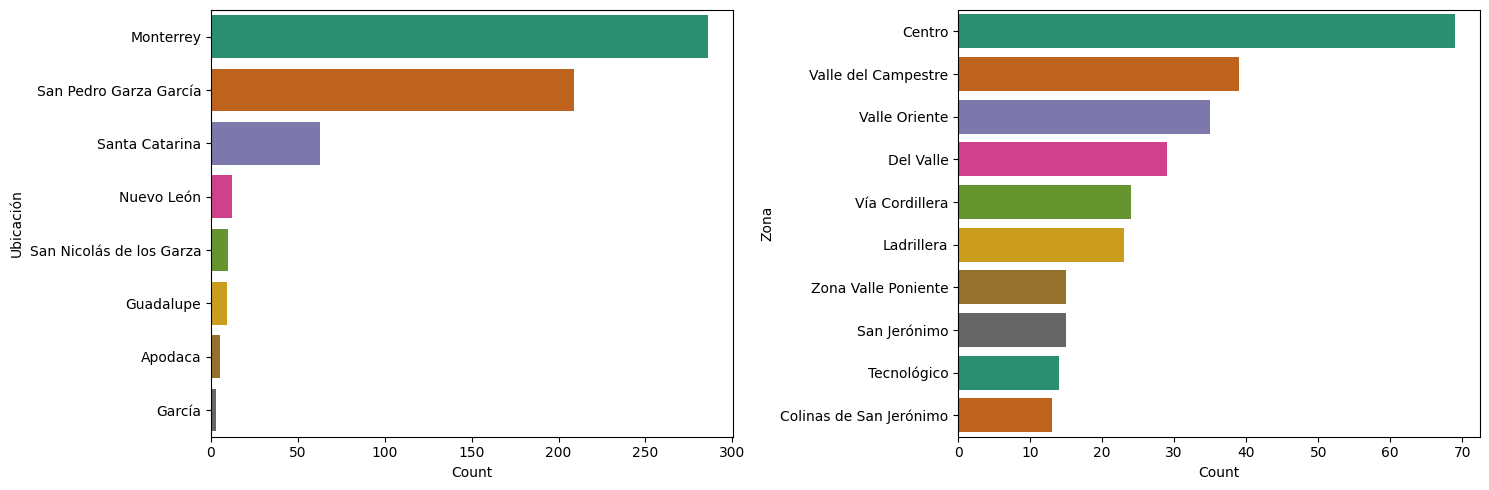

In [103]:
categorical_columns = ['Ubicación', 'Zona']

# Definir la cantidad de filas y columnas para la cuadrícula
rows = 1
cols = 2

# Crear la figura y los ejes con plt.subplots() en formato de cuadrícula
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

# Aplanar los ejes para hacer más fácil iterar
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    top_n = df_1[col].value_counts().nlargest(10)
    sns.barplot(y=top_n.index, x=top_n.values, palette='Dark2', ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Count')
    axes[i].set_yticklabels(top_n.index, rotation=0, ha='right')

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

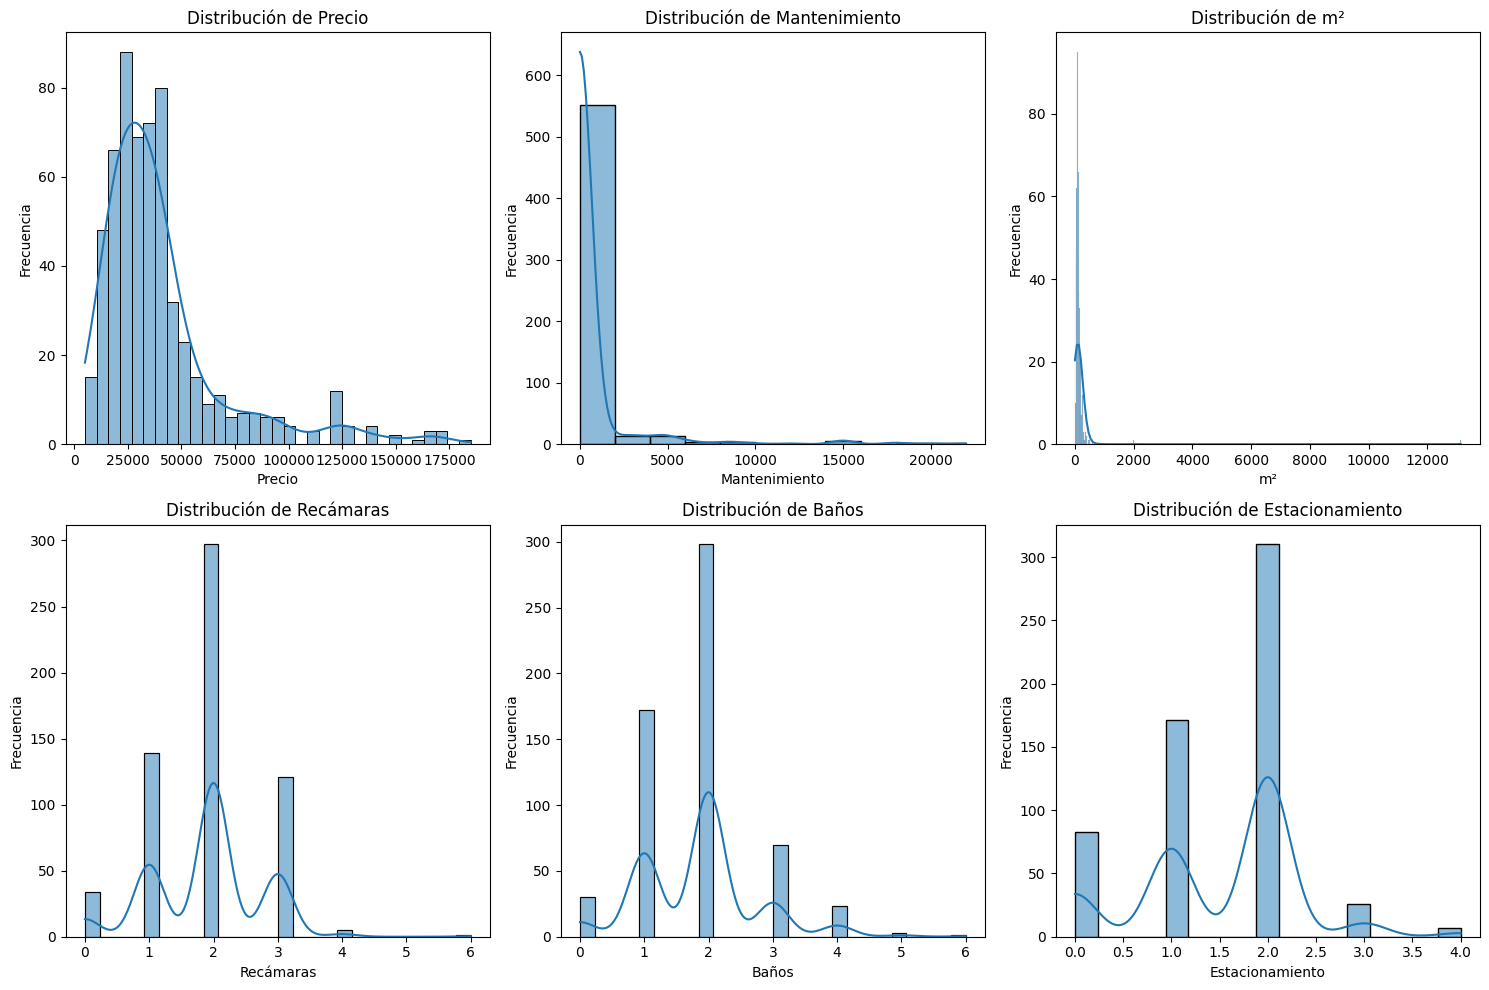

In [104]:
numerical_columns = ['Precio', 'Mantenimiento', 'm²', 'Recámaras', 'Baños', 'Estacionamiento']

rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

axes = axes.flatten()
   
for i, col in enumerate(numerical_columns):
    sns.histplot(df_1[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

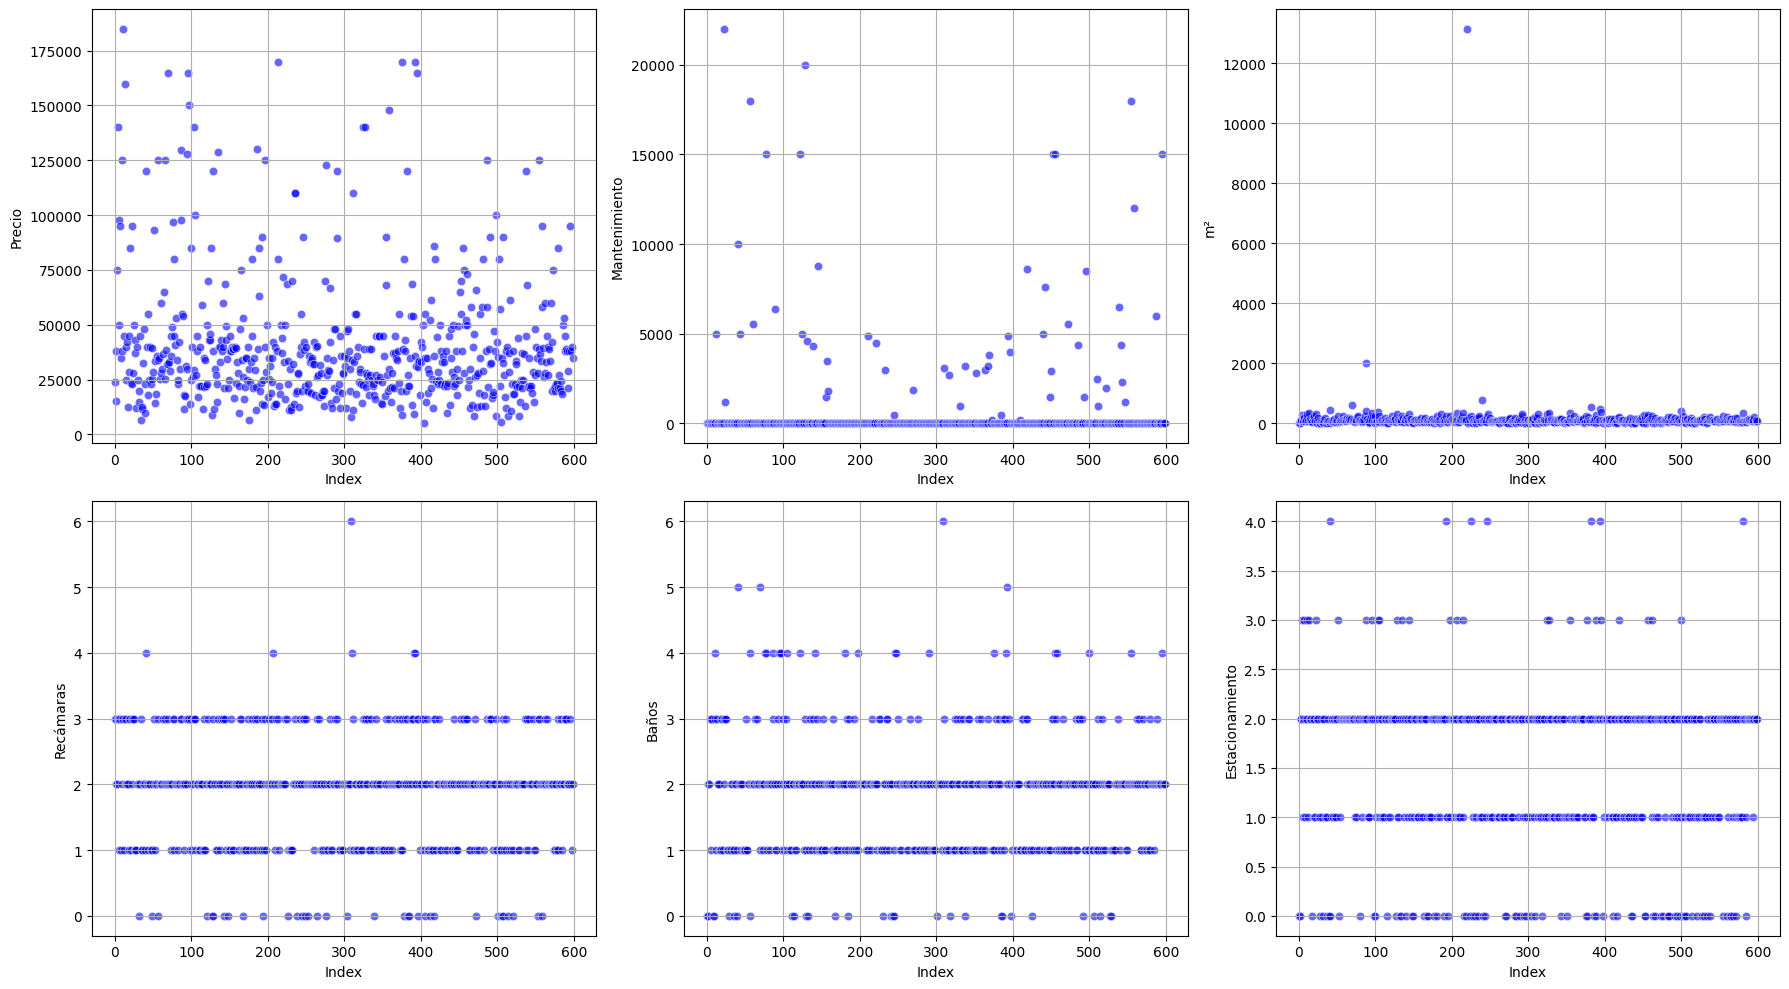

In [105]:
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df_1.index, y=df_1[col], color='blue', alpha=0.6, ax=axes[i])
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

In [106]:
def detect_remove_and_plot_outliers(df, column, threshold=3):
    """
    Detecta, visualiza y elimina valores atípicos en una columna numérica.

    Parameters:
    df (DataFrame): El DataFrame que contiene los datos.
    column (str): El nombre de la columna numérica para analizar.
    threshold (float): El umbral para la detección de valores atípicos.

    Returns:
    DataFrame: El DataFrame sin los outliers.
    """
    # Calcular z-scores
    zscores = zscore(df[column].dropna())
    
    # Detectar outliers
    outliers = df[np.abs(zscores) > threshold]
    non_outliers = df[np.abs(zscores) <= threshold]

    # Imprimir información sobre los outliers
    print(f"Valores atípicos en la columna '{column}':")
    print(outliers[column])

    print(f'\nCantidad de datos antes de remover valores atípicos: {len(df[column])}')
    print(f'Cantidad de datos despúes de remover valores atípicos: {len(non_outliers[column])}')

    # Visualizar los outliers
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de la columna {column} con valores atípicos')
    plt.show()

    return non_outliers

Valores atípicos en la columna 'Precio':
4      140000
11     185000
13     160000
69     165000
96     165000
97     150000
103    140000
214    170000
324    140000
327    140000
359    148000
376    170000
393    170000
395    165000
Name: Precio, dtype: int64

Cantidad de datos antes de remover valores atípicos: 597
Cantidad de datos despúes de remover valores atípicos: 583


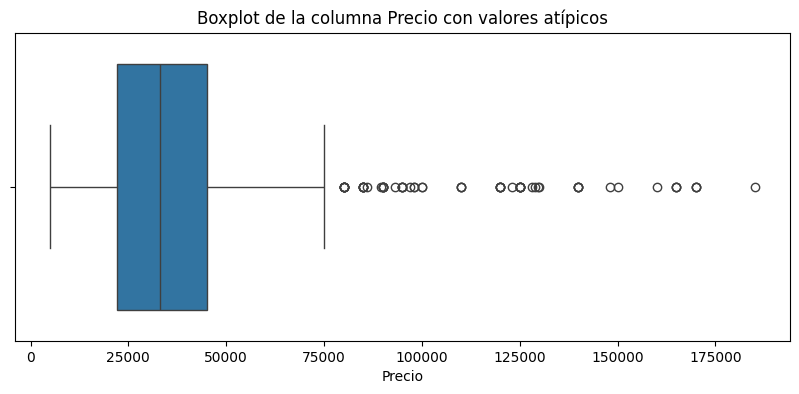

In [107]:
df_clean_depas = detect_remove_and_plot_outliers(df_1, 'Precio', threshold=3)

In [108]:
df_clean_depas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Precio           583 non-null    int64  
 1   Ubicación        583 non-null    object 
 2   Descripción      583 non-null    object 
 3   Latitud          583 non-null    float64
 4   Longitud         583 non-null    float64
 5   Mantenimiento    583 non-null    int64  
 6   Zona             583 non-null    object 
 7   Ubicación_ID     583 non-null    int64  
 8   m²               583 non-null    int64  
 9   Recámaras        583 non-null    int64  
 10  Baños            583 non-null    int64  
 11  Estacionamiento  583 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 59.2+ KB


## Casas

In [109]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Precio           596 non-null    int64  
 1   Ubicación        596 non-null    object 
 2   Descripción      596 non-null    object 
 3   Latitud          572 non-null    float64
 4   Longitud         572 non-null    float64
 5   Mantenimiento    596 non-null    int64  
 6   Zona             596 non-null    object 
 7   Ubicación_ID     543 non-null    float64
 8   m²               596 non-null    int64  
 9   Recámaras        596 non-null    int64  
 10  Baños            596 non-null    int64  
 11  Estacionamiento  596 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 60.5+ KB


In [110]:
df_2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Precio,596.0,65576.89,527463.54,5000.00,17000.00,25500.00,42000.00,12300000.00
Latitud,572.0,25.69,2.78,-33.52,25.66,25.71,25.76,44.84
Longitud,572.0,-99.72,7.87,-106.42,-100.40,-100.34,-100.24,11.62
Mantenimiento,596.0,1378.08,30719.08,0.00,0.00,0.00,0.00,750000.00
Ubicación_ID,543.0,103.45,2.72,101.00,101.00,102.00,106.50,108.00
m²,596.0,266.48,399.75,0.00,119.00,160.00,300.00,5000.00
Recámaras,596.0,3.04,1.32,0.00,3.00,3.00,3.00,20.00
Baños,596.0,2.75,1.33,0.00,2.00,3.00,3.00,10.00
Estacionamiento,596.0,2.13,1.62,0.00,2.00,2.00,2.00,20.00


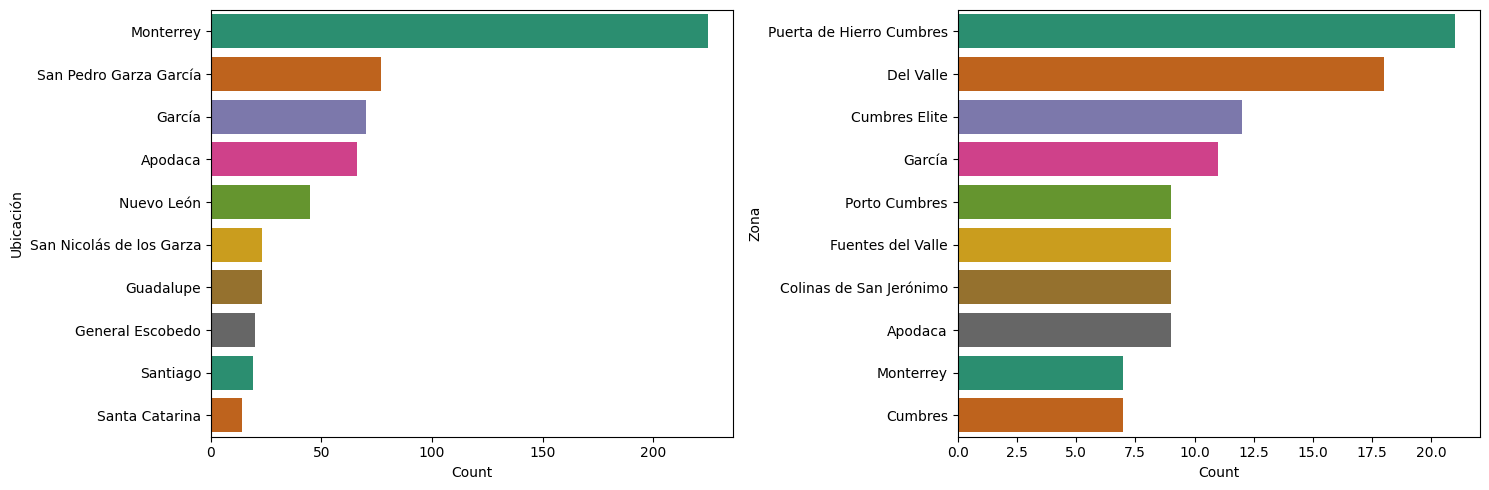

In [111]:
categorical_columns = ['Ubicación', 'Zona']

rows = 1
cols = 2

# Crear la figura y los ejes con plt.subplots() en formato de cuadrícula
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

# Aplanar los ejes para hacer más fácil iterar
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    top_n = df_2[col].value_counts().nlargest(10)
    sns.barplot(y=top_n.index, x=top_n.values, palette='Dark2', ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Count')
    axes[i].set_yticklabels(top_n.index, rotation=0, ha='right')

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

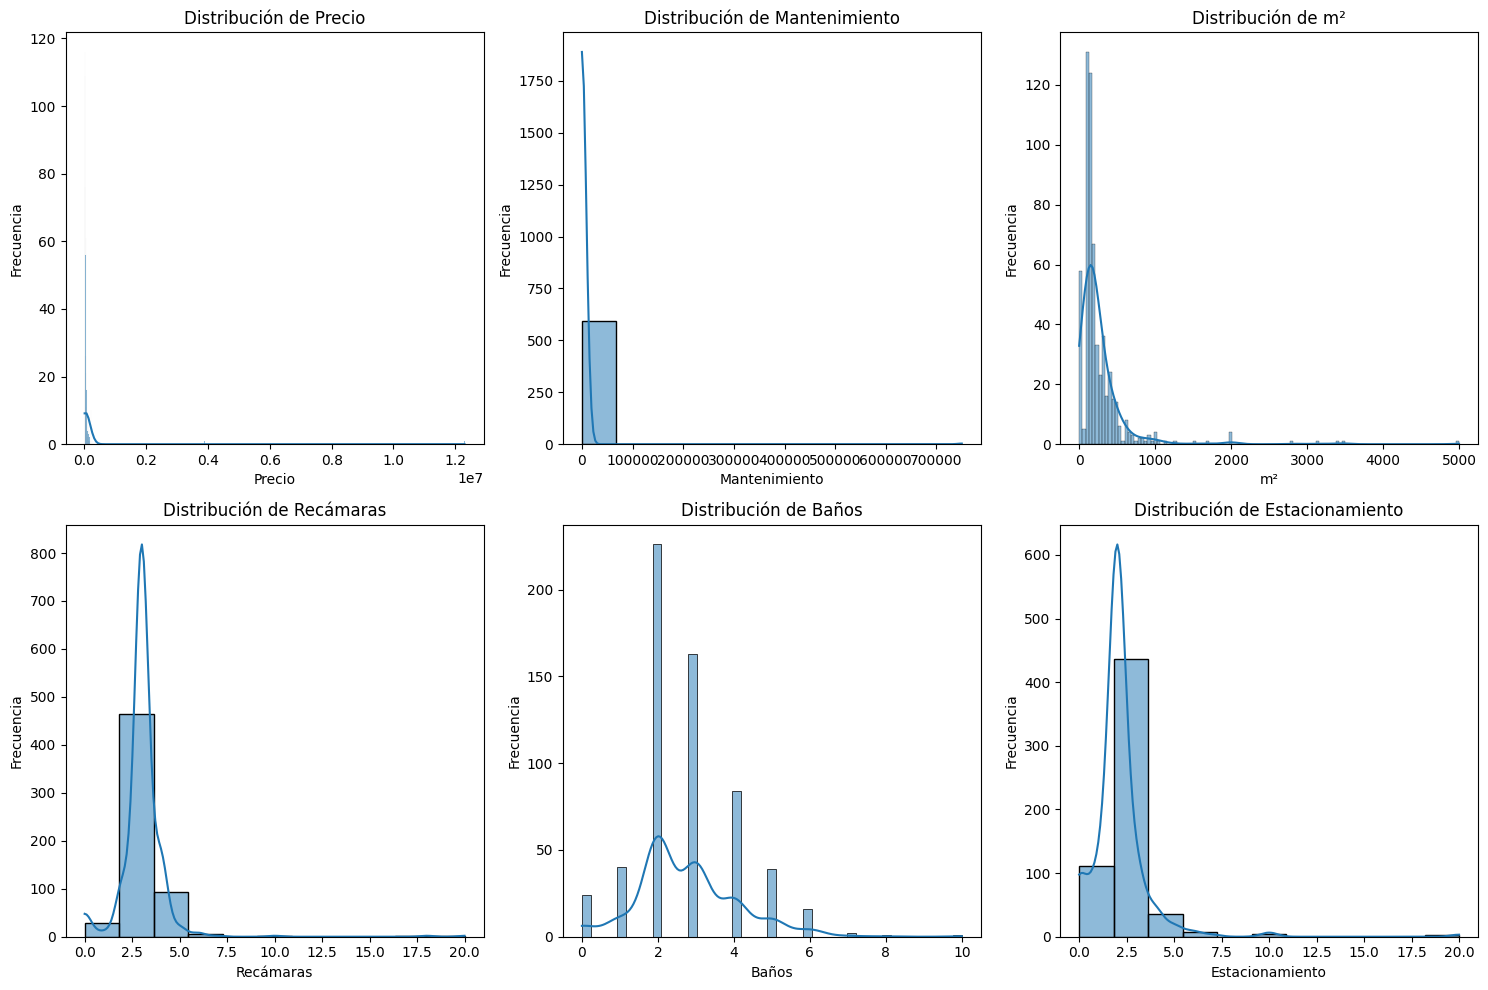

In [112]:
numerical_columns = ['Precio', 'Mantenimiento', 'm²', 'Recámaras', 'Baños', 'Estacionamiento']

rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

axes = axes.flatten()
   
for i, col in enumerate(numerical_columns):
    sns.histplot(df_2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

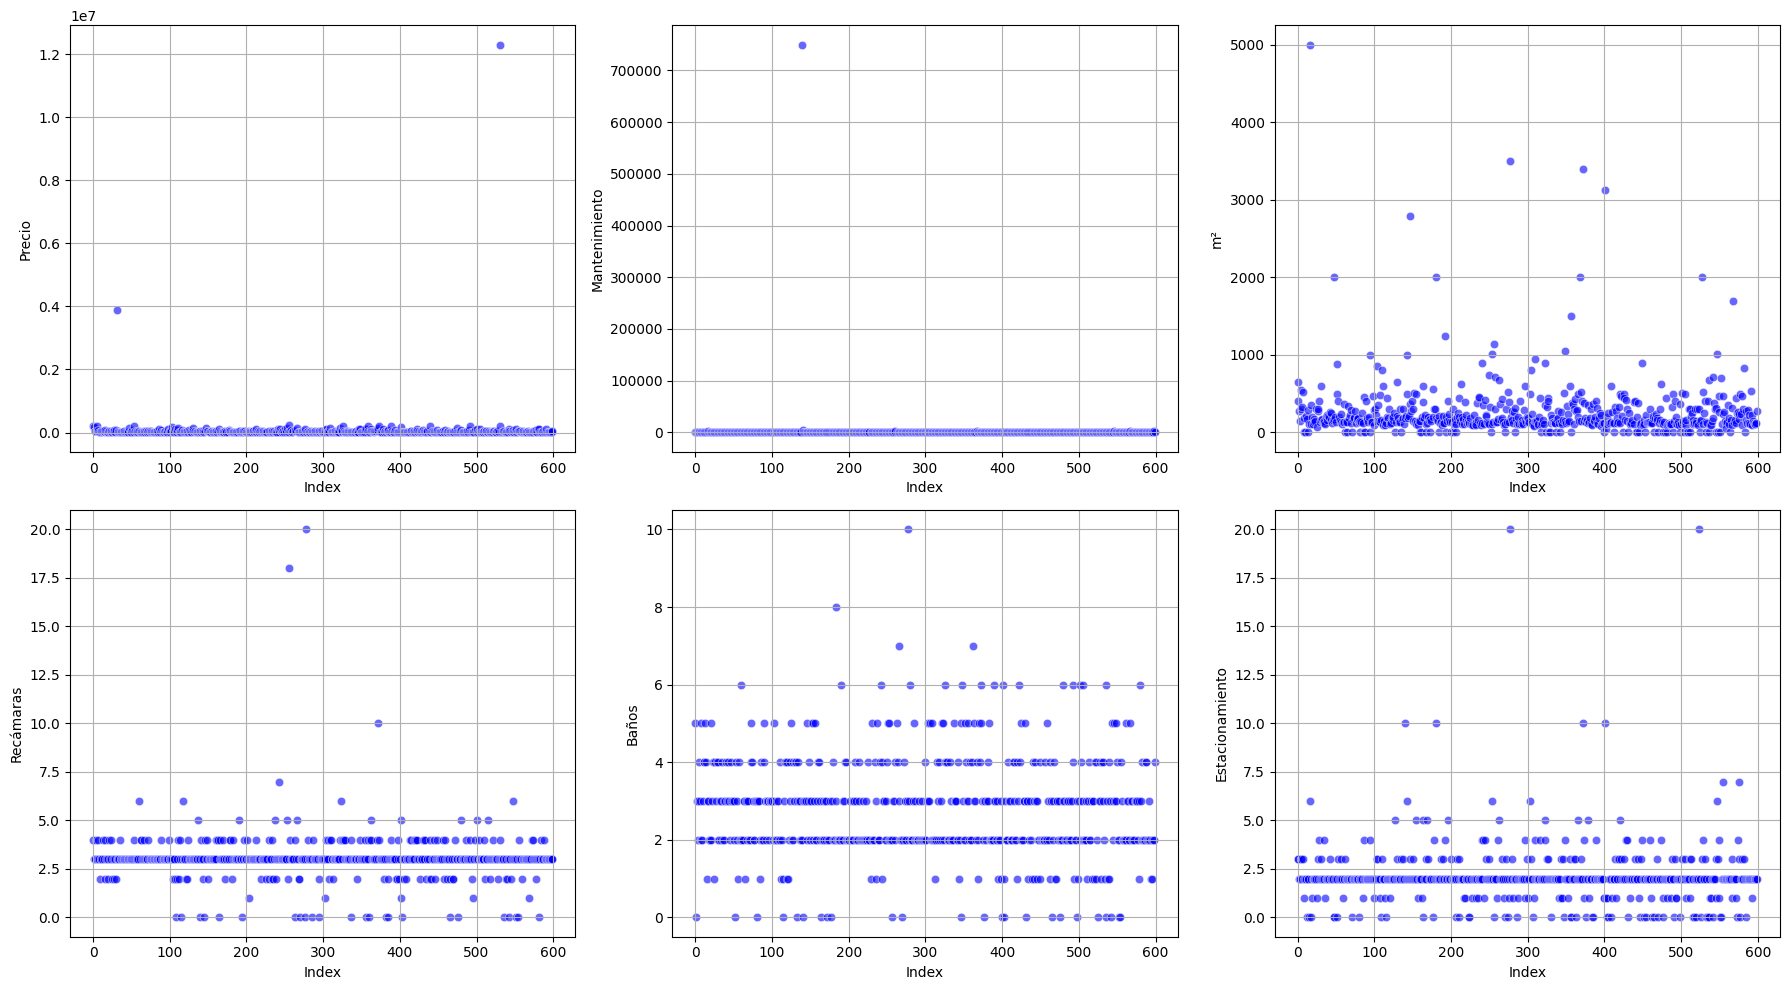

In [113]:
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df_2.index, y=df_2[col], color='blue', alpha=0.6, ax=axes[i])
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()

Valores atípicos en la columna 'Precio':
31      3888000
530    12300000
Name: Precio, dtype: int64

Cantidad de datos antes de remover valores atípicos: 596
Cantidad de datos despúes de remover valores atípicos: 594


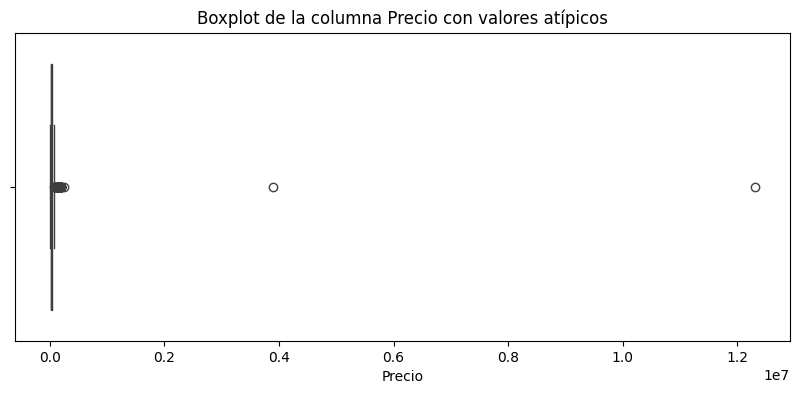

In [114]:
df_clean_casas = detect_remove_and_plot_outliers(df_2, 'Precio', threshold=3)

In [115]:
df_clean_casas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Precio           594 non-null    int64  
 1   Ubicación        594 non-null    object 
 2   Descripción      594 non-null    object 
 3   Latitud          570 non-null    float64
 4   Longitud         570 non-null    float64
 5   Mantenimiento    594 non-null    int64  
 6   Zona             594 non-null    object 
 7   Ubicación_ID     541 non-null    float64
 8   m²               594 non-null    int64  
 9   Recámaras        594 non-null    int64  
 10  Baños            594 non-null    int64  
 11  Estacionamiento  594 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 60.3+ KB


# Exportar Datasets

In [116]:
# Incluyendo valores atípicos
df_1.to_csv('depas_clean.csv', index=False)
df_2.to_csv('casas_clean.csv', index=False)

In [117]:
# Sin valores atípicos
df_clean_depas.to_csv('depas_sin_outliers.csv', index=False)
df_clean_casas.to_csv('casas_sin_outliers.csv', index=False)

# Análisis estadístico de datos

## Prueba de hipótesis

* **Hipótesis nula (H₀)**: Los precios de alquiler de casas y departamentos en la misma zona no tienen una diferencia significativa. Es decir, **la media de los precios de las casas es igual a la de los departamentos.**
* **Hipótesis alternativa (H₁)**: Existe una diferencia significativa en los precios de alquiler entre casas y departamentos.

In [118]:
# Filtrar los datos por casas y departamentos
casas = df_clean_casas[['Zona', 'Precio']]
departamentos = df_clean_depas[['Zona', 'Precio']]

# Asegurarse de tener las mismas zonas
zonas_comunes = set(casas['Zona']).intersection(set(departamentos['Zona']))

# Filtrar para incluir solo las zonas comunes
casas_comunes = casas[casas['Zona'].isin(zonas_comunes)]
departamentos_comunes = departamentos[departamentos['Zona'].isin(zonas_comunes)]


In [119]:
# Comparar precios de casas y departamentos
t_stat, p_value = stats.ttest_ind(casas_comunes['Precio'], departamentos_comunes['Precio'], equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretación del valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los precios de alquiler.")
else:
    print("No podemos rechazar la hipótesis nula: No hay una diferencia significativa entre los precios de alquiler.")

T-statistic: 5.235643534739333
P-value: 4.356700934705087e-07
Rechazamos la hipótesis nula: Hay una diferencia significativa entre los precios de alquiler.


Dado que el p-value es mucho menor que nuestro nivel de significancia típico (α=0.05), rechazamos la hipótesis nula (H₀). Esto significa que hay una diferencia significativa entre los precios de alquiler de casas y departamentos en la misma zona.

Podemos concluir que los precios de alquiler de casas y departamentos en la misma zona no son iguales, y esta diferencia es estadísticamente significativa.

* **Hipótesis nula (H₀)**: No hay diferencia significativa en los precios medios de alquiler entre la Zona A y la Zona B.
* **Hipótesis alternativa (H₁)**: Hay una diferencia significativa en los precios medios de alquiler entre la Zona A y la Zona B.

In [120]:
# Supongamos que tienes dos zonas "Zona A" y "Zona B"
zona_A = df_clean_casas[df_clean_casas['Zona'] == 'Puerta de Hierro Cumbres']['Precio']
zona_B = df_clean_casas[df_clean_casas['Zona'] == 'Del Valle']['Precio']

# Realizamos la prueba t de Student
t_stat, p_value = stats.ttest_ind(zona_A, zona_B)

# Mostramos los resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretación del valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los precios de alquiler.")
else:
    print("No podemos rechazar la hipótesis nula: No hay una diferencia significativa entre los precios de alquiler.")


Estadístico t: -5.404107433853836
Valor p: 4.025248449288716e-06
Rechazamos la hipótesis nula: Hay una diferencia significativa entre los precios de alquiler.


## Regresion lineal

In [121]:
# Seleccionar las variables independientes (X) y la dependiente (y)
X = df_clean_depas[['m²', 'Recámaras', 'Baños', 'Estacionamiento']]
y = df_clean_depas['Precio']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
regression_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regression_model.fit(X_train, y_train)

# Predecir los precios usando los datos de prueba
y_pred = regression_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

# Mostrar los coeficientes de las variables
print("Coeficientes del modelo:")
for idx, col_name in enumerate(X.columns):
    print(f"{col_name}: {regression_model.coef_[idx]}")

Mean Squared Error: 449260374.49756473
R-squared: 0.3772249264047106

Coeficientes del modelo:
m²: 3.5721223626769656
Recámaras: -1308.5463382161088
Baños: 11329.384124285018
Estacionamiento: 8425.762495034669


* **MSE**: Indica que, en promedio, el modelo tiene un error cuadrático medio de alrededor de 449,260 cuando predice el precio de alquiler. Un valor más bajo de MSE es mejor, y en este caso, el error parece un poco elevado, lo que indica que el modelo no está prediciendo los precios con tanta precisión.
* **R²**: Significa que el 38% de la variabilidad en los precios de alquiler está explicada por las variables independientes del modelo (m², Recámaras, Baños, Estacionamiento). Aunque no es un mal resultado, indica que todavía hay un 62% de la variabilidad que no está explicada por las variables seleccionadas, lo que sugiere que otros factores que no están en el modelo podrían estar influyendo en los precios de alquiler (como la ubicación o zona).
* **m²**: Por cada metro cuadrado adicional, el precio de alquiler aumenta, en promedio, 3.57 unidades monetarias.
* **Recámaras**: Sorprendentemente, el número de recámaras tiene un coeficiente negativo. Por cada recámara adicional, el precio de alquiler disminuye, en promedio, en 1308.54 unidades monetarias. Esto puede deberse a un patrón en los datos o correlaciones no esperadas, y podríamos investigar más a fondo por qué sucede esto.
* **Baños**: Por cada baño adicional, el precio de alquiler aumenta, en promedio, en 11,329.38 unidades monetarias. Esto indica que tener más baños tiende a aumentar considerablemente el precio de alquiler.
* **Estacionamiento**: Cada espacio de estacionamiento adicional está asociado con un incremento en el precio de alquiler de 8425.76 unidades monetarias.

In [122]:
# Seleccionar las variables independientes (X) y la dependiente (y)
X = df_clean_casas[['m²', 'Recámaras', 'Baños', 'Estacionamiento']]
y = df_clean_casas['Precio']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
regression_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regression_model.fit(X_train, y_train)

# Predecir los precios usando los datos de prueba
y_pred = regression_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

# Mostrar los coeficientes de las variables
print("Coeficientes del modelo:")
for idx, col_name in enumerate(X.columns):
    print(f"{col_name}: {regression_model.coef_[idx]}")

Mean Squared Error: 765167531.9946355
R-squared: 0.30485089233843965

Coeficientes del modelo:
m²: 37.70998796644802
Recámaras: 4533.989660508943
Baños: 8867.505995571806
Estacionamiento: -709.9519841209694
